In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题


In [2]:
data = pd.read_csv('data.csv')
data = data.drop(columns=['Unnamed: 0', '标题', '链接', '产权年限', '位置2'])
data = data[data['位置1'] != '厦门周边']
data = data.dropna()
data

,总价,均价,位置1,房屋户型,房本面积,房屋朝向,一手房源,所在楼层,装修情况,建筑年代,小区名,小区均价,物业费,容积率,绿化率,车位信息
1,205.0,25065元/㎡,集美,2室2厅1卫,81.79㎡,南北,否,低层(共27层),精装修,2015年,夏商新纪元(二期),26475.0元/㎡,2.0元/平米/月,3.04,38,750.0
2,235.0,22863元/㎡,同安,3室2厅2卫,102.79㎡,南北,否,高层(共33层),精装修,2012年,禹洲大学城,24420.0元/㎡,1.6元/平米/月,4.50,35,1100.0
3,448.0,45612元/㎡,思明,3室2厅1卫,98.22㎡,南北,否,中层(共7层),精装修,2010年,侨福城小区(二期),47846.0元/㎡,0.8元/平米/月,0.00,27,500.0
4,210.0,23662元/㎡,集美,2室2厅1卫,88.75㎡,南,否,低层(共23层),简单装修,2016年,夏商新纪元(一期),26567.0元/㎡,2.0元/平米/月,3.04,38,1034.0
5,460.0,66503元/㎡,思明,2室1厅1卫,69.17㎡,北,否,高层(共19层),简单装修,2006年,荣滨大厦,70847.0元/㎡,1.25元/平米/月,7.17,0,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,672.0,45575元/㎡,思明,3室2厅2卫,147.45㎡,东北,否,高层(共8层),精装修,2000年,新港龙花园,53262.0元/㎡,0.8元/平米/月,3.45,27,100.0
938,345.0,35316元/㎡,思明,3室2厅1卫,97.69㎡,南北,否,高层(共7层),精装修,1997年,金鸡亭花园小区,40842.0元/㎡,0.5元/平米/月,0.00,33,500.0
939,289.0,29192元/㎡,海沧,3室2厅1卫,99.0㎡,南北,否,中层(共11层),精装修,2009年,绿苑水岸名筑,33213.0元/㎡,2.0元/平米/月,1.80,47,1000.0
940,456.0,40354元/㎡,湖里,3室2厅2卫,113.0㎡,南,否,高层(共10层),精装修,2007年,翔鹭花城(二期),43321.0元/㎡,1.2元/平米/月,2.20,40,200.0


In [3]:
data['室'] = data['房屋户型'].apply(lambda x: int(x[0]))
data['厅'] = data['房屋户型'].apply(lambda x: int(x[2]))
data['卫'] = data['房屋户型'].apply(lambda x: int(x[4]))
data['均价'] = data['均价'].apply(lambda x: float(x.split('元')[0]))
data['房本面积'] = data['房本面积'].apply(lambda x: float(x[:-1]))
data['建筑年代'] = data['建筑年代'].apply(lambda x: int(x[:-1]))
data['总楼层'] = data['所在楼层'].apply(lambda x: int(x[4:-2]))
data['所在楼层'] = data['所在楼层'].apply(lambda x: x[0])
data['小区均价'] = data['小区均价'].apply(
    lambda x: float(x.split('元')[0]))
data['物业费'] = data['物业费'].apply(
    lambda x: float(x.split('元')[0]))
data['绿化率'] = data['绿化率'].apply(float)
data['车位信息'] = data['车位信息'].apply(int)

In [4]:
data

,总价,均价,位置1,房屋户型,房本面积,房屋朝向,一手房源,所在楼层,装修情况,建筑年代,小区名,小区均价,物业费,容积率,绿化率,车位信息,室,厅,卫,总楼层
1,205.0,25065.0,集美,2室2厅1卫,81.79,南北,否,低,精装修,2015,夏商新纪元(二期),26475.0,2.00,3.04,38.0,750,2,2,1,27
2,235.0,22863.0,同安,3室2厅2卫,102.79,南北,否,高,精装修,2012,禹洲大学城,24420.0,1.60,4.50,35.0,1100,3,2,2,33
3,448.0,45612.0,思明,3室2厅1卫,98.22,南北,否,中,精装修,2010,侨福城小区(二期),47846.0,0.80,0.00,27.0,500,3,2,1,7
4,210.0,23662.0,集美,2室2厅1卫,88.75,南,否,低,简单装修,2016,夏商新纪元(一期),26567.0,2.00,3.04,38.0,1034,2,2,1,23
5,460.0,66503.0,思明,2室1厅1卫,69.17,北,否,高,简单装修,2006,荣滨大厦,70847.0,1.25,7.17,0.0,270,2,1,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,672.0,45575.0,思明,3室2厅2卫,147.45,东北,否,高,精装修,2000,新港龙花园,53262.0,0.80,3.45,27.0,100,3,2,2,8
938,345.0,35316.0,思明,3室2厅1卫,97.69,南北,否,高,精装修,1997,金鸡亭花园小区,40842.0,0.50,0.00,33.0,500,3,2,1,7
939,289.0,29192.0,海沧,3室2厅1卫,99.00,南北,否,中,精装修,2009,绿苑水岸名筑,33213.0,2.00,1.80,47.0,1000,3,2,1,11
940,456.0,40354.0,湖里,3室2厅2卫,113.00,南,否,高,精装修,2007,翔鹭花城(二期),43321.0,1.20,2.20,40.0,200,3,2,2,10


39870.23898531375

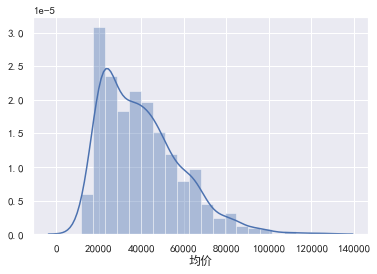

In [5]:
sns.distplot(data['均价'])
data['均价'].mean()

426.53738317757

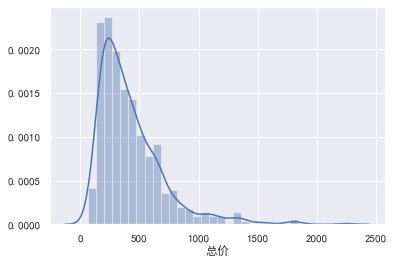

In [6]:
sns.distplot(data['总价'])
data['总价'].mean()

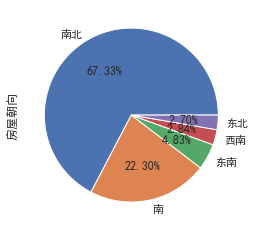

In [7]:
data['房屋朝向'].value_counts().head(5).plot.pie(autopct='%.2f%%')

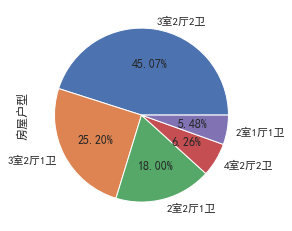

In [8]:
data['房屋户型'].value_counts().head(5).plot.pie(autopct='%.2f%%')

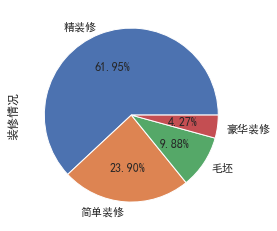

In [9]:
data['装修情况'].value_counts().plot.pie(autopct='%.2f%%')

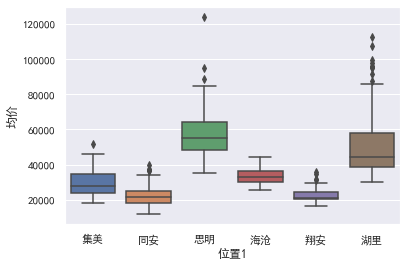

In [10]:
sns.boxplot(data=data, x='位置1', y='均价')

In [11]:
data.groupby(by=['位置1'])['总价','房本面积','建筑年代','总楼层'].mean()

,总价,房本面积,建筑年代,总楼层
位置1,,,,
同安,219.554902,99.694118,2009.696078,19.843137
思明,614.728643,107.632060,2001.391960,14.025126
海沧,349.827273,102.183273,2009.727273,23.800000
湖里,579.220859,112.636258,2004.036810,13.631902
翔安,199.371845,89.481845,2011.019417,20.223301
集美,319.386614,105.370945,2011.362205,24.944882


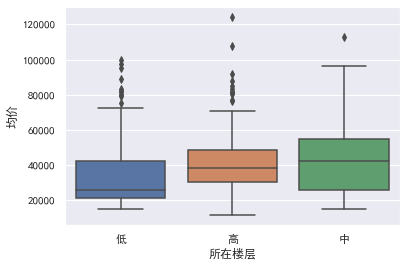

In [12]:
sns.boxplot(data=data, x='所在楼层', y='均价')

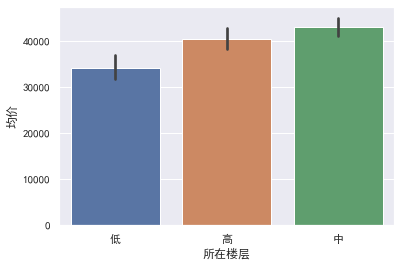

In [13]:
sns.barplot(x='所在楼层', y='均价', data=data)

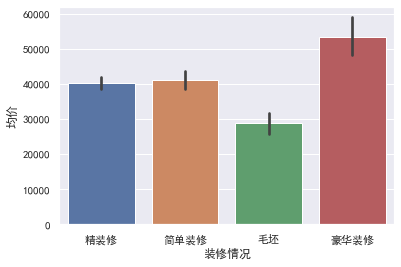

In [14]:
sns.barplot(x='装修情况', y='均价', data=data)

In [27]:
xiaoqu_data=data.groupby(by='小区名')['小区均价'].mean().sort_values(ascending=False)

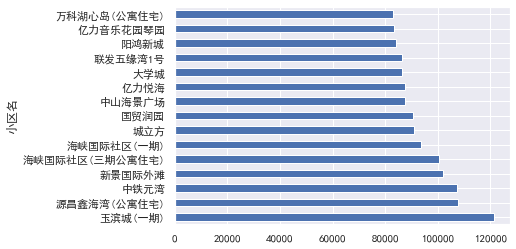

In [28]:
xiaoqu_data.head(15).plot(kind='barh')

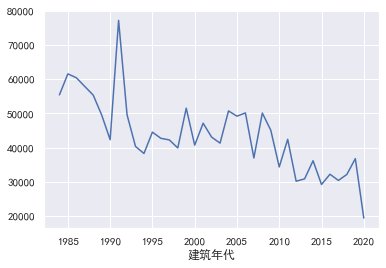

In [62]:
data.groupby(by='建筑年代')['均价'].mean().plot()

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

x=data.drop(columns=['总价','均价','房屋户型','小区名'])
y=data['均价']

for col in ['位置1','房屋朝向','一手房源','所在楼层','装修情况']:
    le = LabelEncoder()
    x[col]=le.fit_transform(x[col])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [63]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
print(f'决策树绝对值误差：{mean_absolute_error(dt.predict(x_test),y_test)}')

决策树绝对值误差：2635.0466666666666


In [68]:
rf = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
rf.fit(x_train, y_train)
print(f'随机森林绝对值误差：{mean_absolute_error(rf.predict(x_test),y_test)}')

随机森林绝对值误差：2117.8483501666674


In [67]:
cb=CatBoostRegressor()
cb.fit(x_train, y_train)
print(f'Catboost绝对值误差：{mean_absolute_error(cb.predict(x_test),y_test)}')

Learning rate set to 0.035627
0:	learn: 17624.6033693	total: 14.8ms	remaining: 14.8s
1:	learn: 17181.6614986	total: 20ms	remaining: 9.98s
2:	learn: 16713.4740356	total: 22ms	remaining: 7.31s
3:	learn: 16291.3193530	total: 30.9ms	remaining: 7.7s
4:	learn: 15830.8241762	total: 36.4ms	remaining: 7.24s
5:	learn: 15402.1093897	total: 40.6ms	remaining: 6.72s
6:	learn: 15018.4433428	total: 48.9ms	remaining: 6.94s
7:	learn: 14637.2718970	total: 52.5ms	remaining: 6.51s
8:	learn: 14287.8395878	total: 60.4ms	remaining: 6.65s
9:	learn: 13953.7458525	total: 64.1ms	remaining: 6.35s
10:	learn: 13604.2942001	total: 77ms	remaining: 6.92s
11:	learn: 13291.2969660	total: 80.8ms	remaining: 6.66s
12:	learn: 12960.6564570	total: 84.3ms	remaining: 6.4s
13:	learn: 12660.8203036	total: 88ms	remaining: 6.2s
14:	learn: 12343.0898192	total: 94.2ms	remaining: 6.18s
15:	learn: 12034.6337795	total: 97.5ms	remaining: 6s
16:	learn: 11737.4361584	total: 104ms	remaining: 6.02s
17:	learn: 11512.1561525	total: 107ms	remai

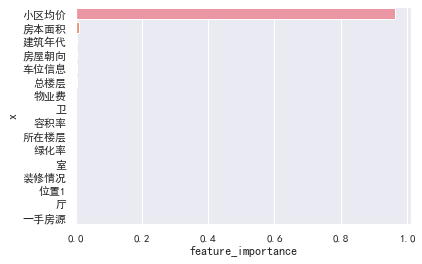

In [69]:
fi = pd.DataFrame(
    {'x': x.columns, 'feature_importance': rf.feature_importances_})
fi = fi.sort_values(by='feature_importance',ascending=False)
sns.barplot(x='feature_importance', y='x', data=fi)

随机森林绝对值误差：4229.042020809523


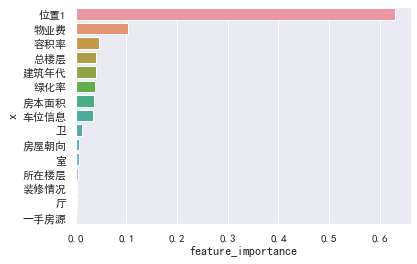

In [75]:
rf2 = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
rf2.fit(x_train.drop(columns='小区均价'), y_train)
rf2_predict=rf2.predict(x_test.drop(columns='小区均价'))
print(f'随机森林绝对值误差：{mean_absolute_error(rf2_predict,y_test)}')

fi2 = pd.DataFrame(
    {'x': x_train.drop(columns='小区均价').columns, 'feature_importance': rf2.feature_importances_})
fi2 = fi2.sort_values(by='feature_importance',ascending=False)
sns.barplot(x='feature_importance', y='x', data=fi2)